<a href="https://colab.research.google.com/github/franco05hk/Meriskill/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url='https://raw.githubusercontent.com/franco05hk/Meriskill/main/diabetes.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df1.describe
df1.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset contains 768 individuals information.As value of 0 is not likely to be normal, it should be treated as missing value to avoid them from affecting the analyzing results.

*   Individuals age between 21 to 81, having an average of 33.2
*   Pregnancies between 0-17
*   Glucose between 0-199, average 120.9
*   Blood Pressure between 0-122, average 69.1
*   Skin Thickness between 0-99, average 20.5
*   Insulin level between 0-846, average 79.8
*   BMI between 0-67.1, average 32


In [ ]:
replace_column= ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df1[replace_column] = df1[replace_column].replace(0,np.nan)
df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
fill_columns=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df1[fill_columns] = df1[fill_columns].fillna(df1[fill_columns].mean())
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

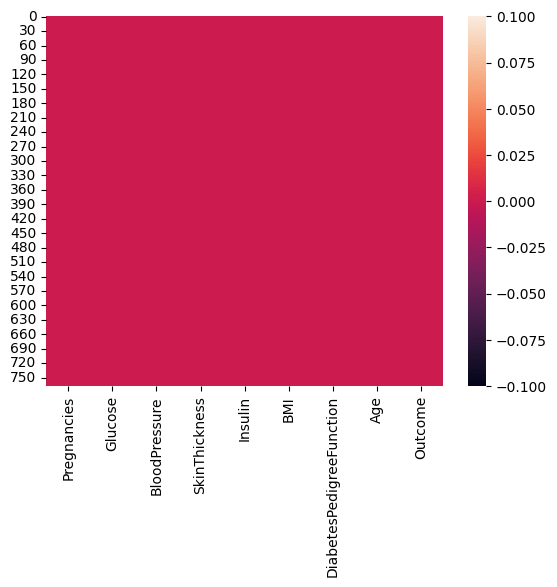

In [ ]:
sns.heatmap(df1.isnull())

In [ ]:
print(df1.isnull().any().sum())
print(df1.isnull().sum())

0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

<Axes: >

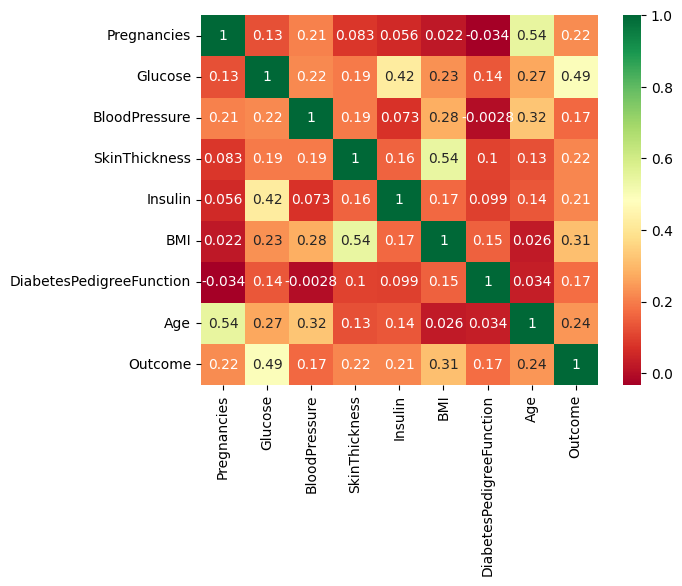

In [ ]:
correlation = df1.corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap="RdYlGn")

Highest correlation to Diabetes is Glucose level with 0.49, while lowest correlations to Diabetes are Blood Pressure/DiabetesPedigreeFunction with 0.17.

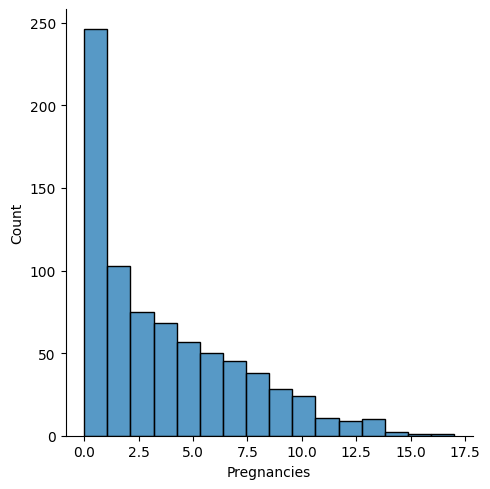

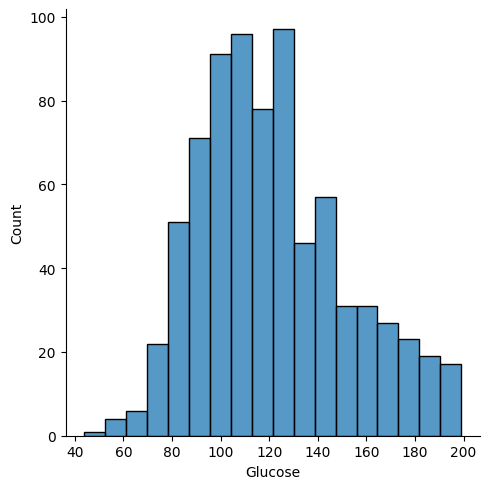

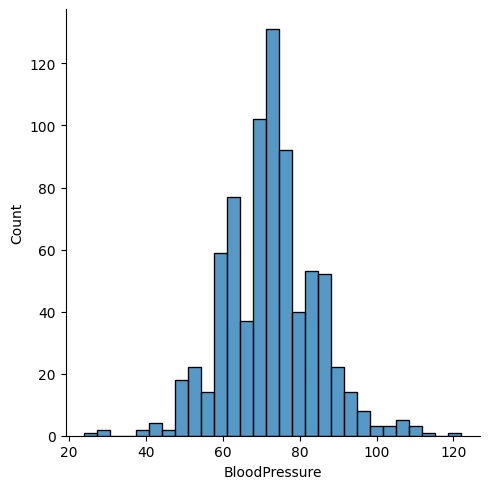

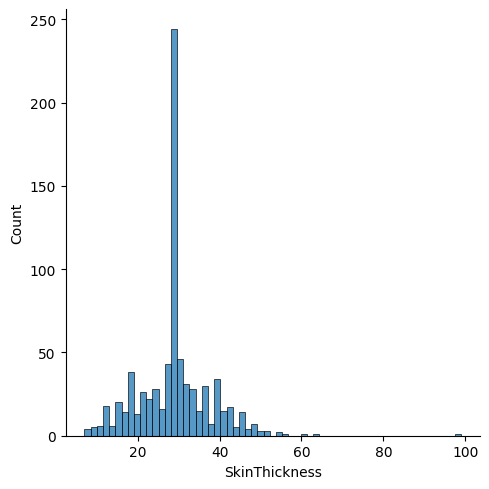

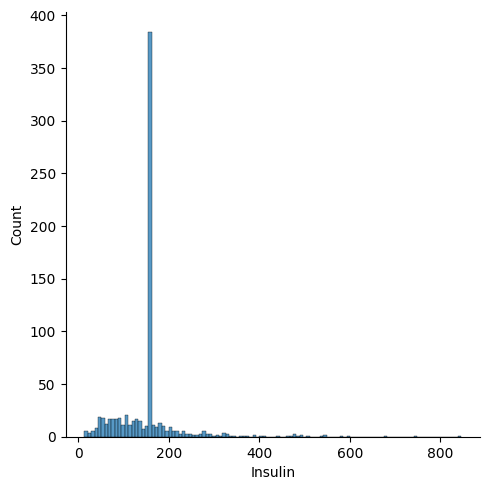

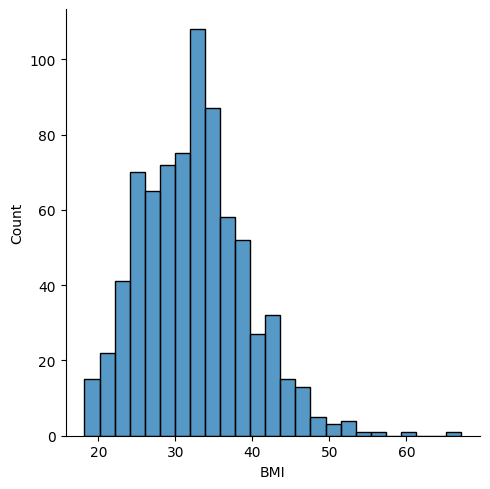

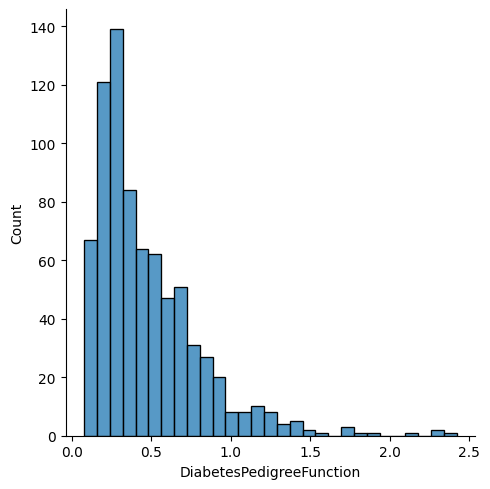

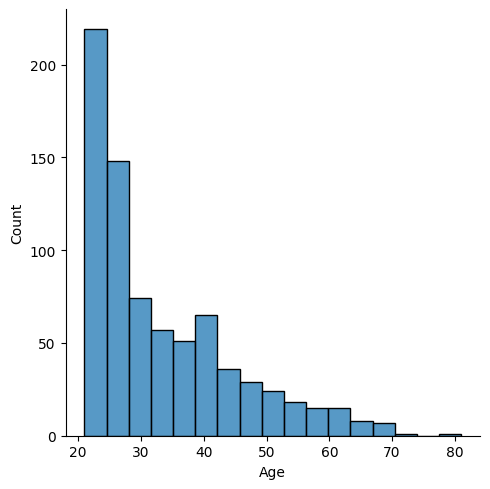

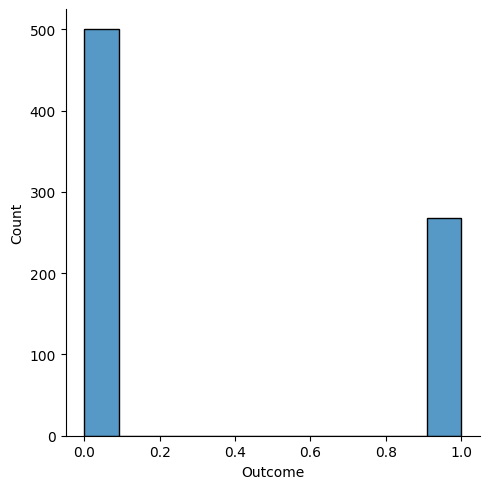

In [ ]:
for column in df1.columns:
    sns.displot(df1[column])
    plt.show()

<Axes: ylabel='Outcome'>

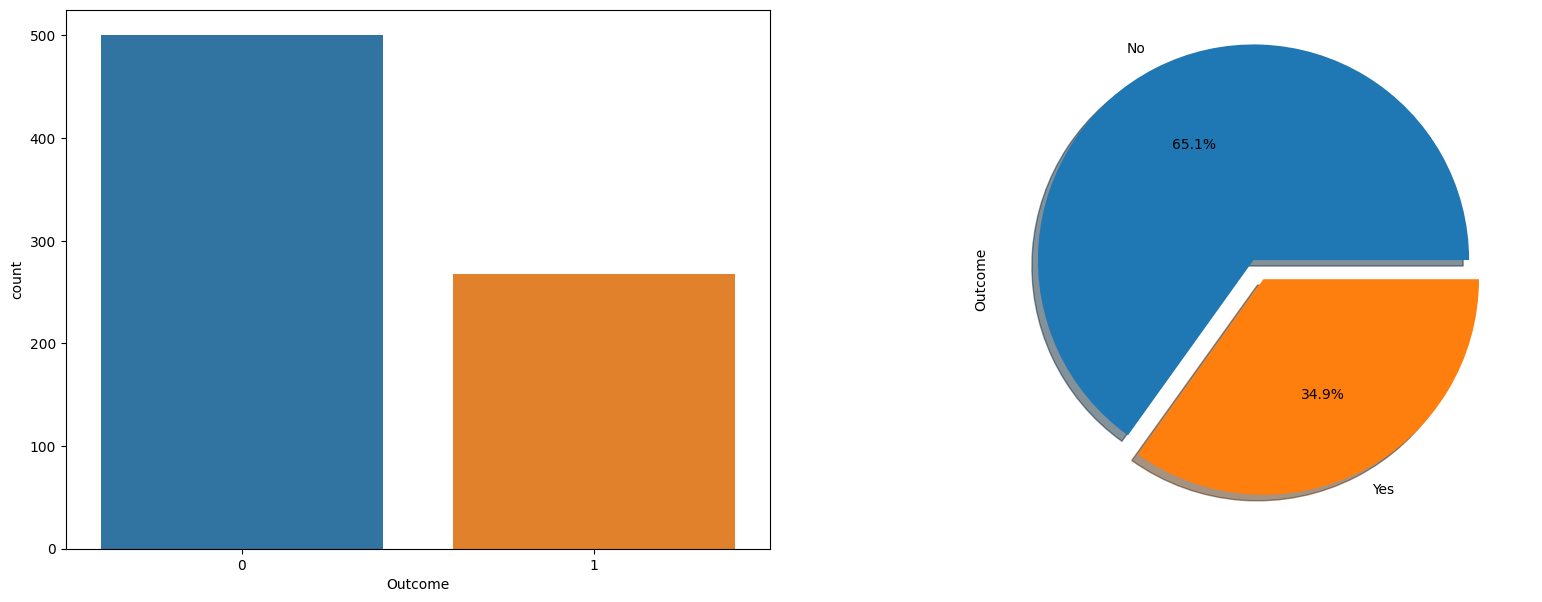

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.countplot(data=df1, x="Outcome", ax=ax[0])
df1["Outcome"].value_counts().plot.pie(explode=[0.1,0], autopct= "%1.1f%%", labels=["No","Yes"], shadow=True, ax=ax[1])

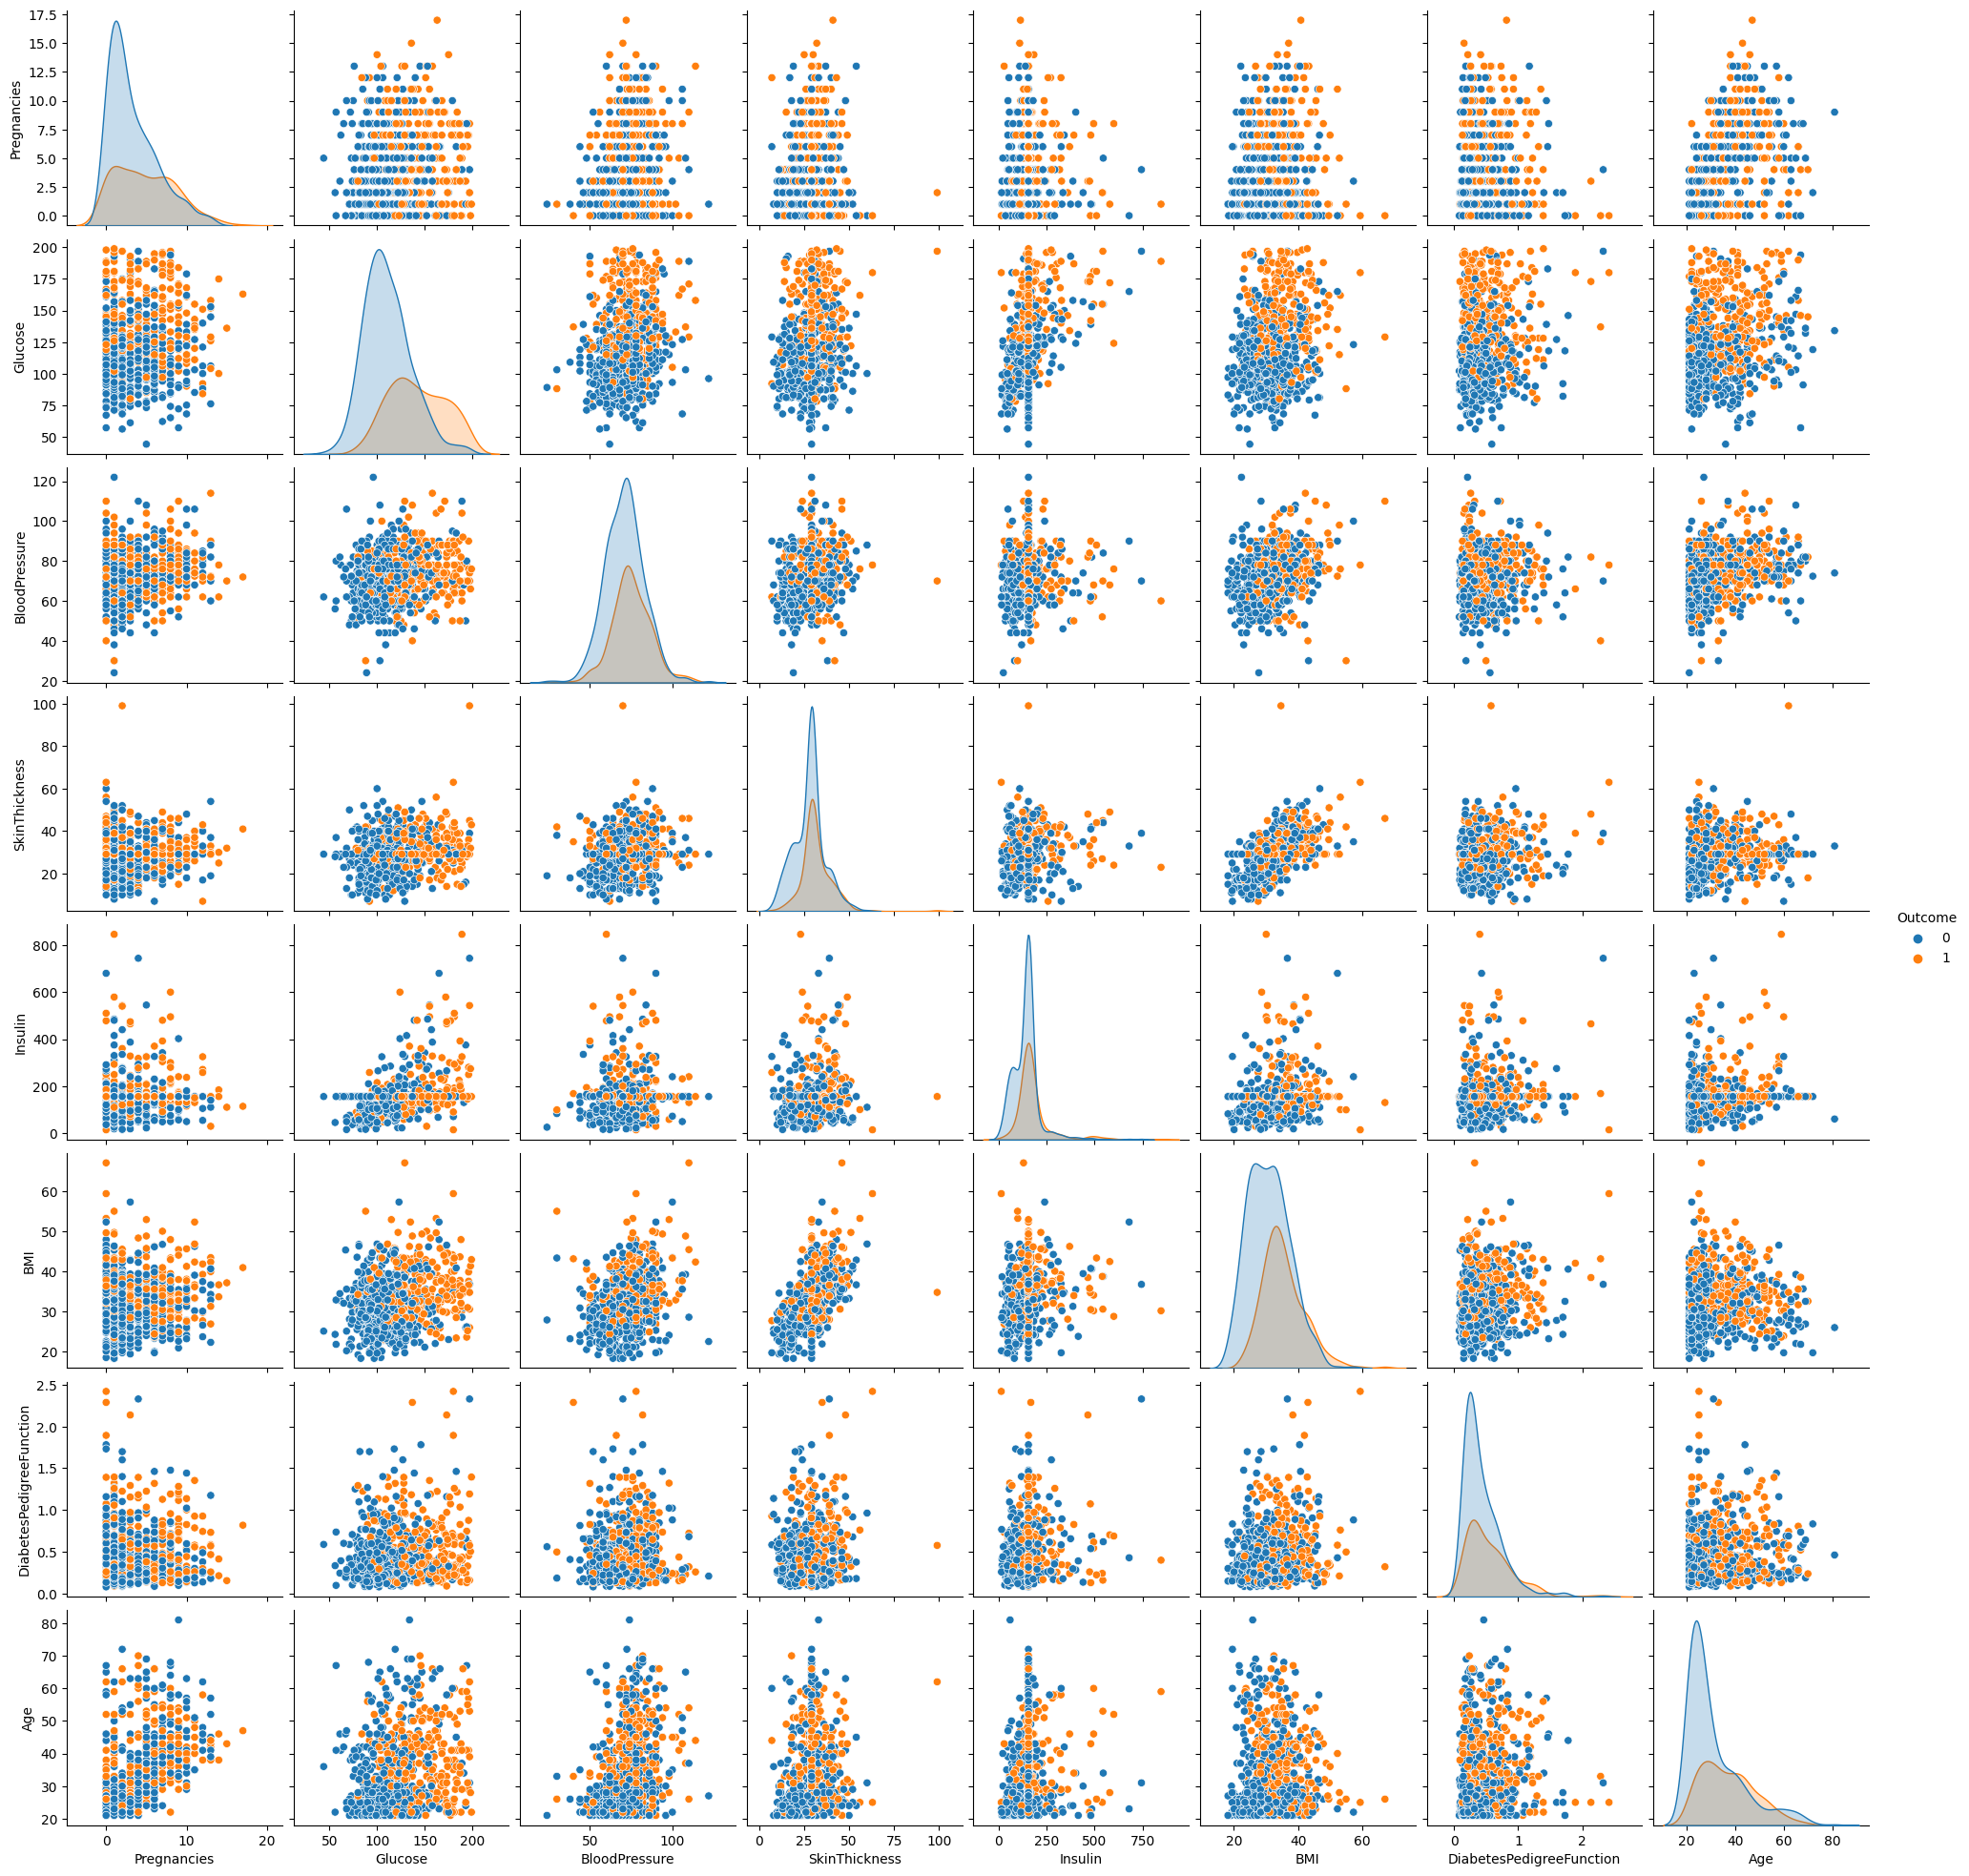

In [ ]:
sns.pairplot(df1,hue='Outcome')
plt.show()

In [ ]:
X=df1.drop("Outcome",axis=1)
Y=df1['Outcome']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = model.predict(X_test)
print(prediction)

[0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0
 1 1 0 0 0 0]


In [ ]:
accuracy = accuracy_score(prediction,Y_test)
print(accuracy)

0.7467532467532467


**Conclusion**:
268 in 768 patients have been diagnosed with diabetes
The most significant factor for having diabetes is HIGH Glucose level.
Those with HIGH blood pressure, BMI, skin thickness and insulin also have higher chance of having diabetes.